In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.spatial.distance import cdist

# compute distances MACs to Epi

In [66]:
data_path = "G:/21_11_24_Mouse_Temporary/analysis/day3/"
save_path = "G:/21_11_24_Mouse_Temporary/analysis/day3/distances/"
df1 = pd.read_csv(data_path+'day3_unified_community_data.csv', index_col=0)
df1;

In [67]:
df1['Cell common'].unique()

array(['Macrophage CD169+', 'CD4+ T cell', 'DC', 'Stromal', 'Tumor Ki67+',
       'Tumor PDL1+ MHCI+', 'Tumor', 'Macrophage', 'Neutrophil', 'NK',
       'CD8+ T cell PD1+', 'CD8+ T cell', 'CD4+ Treg', 'B cell'],
      dtype=object)

In [68]:
cell_list = ['CD4+ T cell', 'Macrophage','CD8+ T cell', 'CD8+ T cell PD1+','Tumor PDL1+ MHCI+']
df_s = df1.loc[df1['Cell common'].isin(cell_list)]
df_s

,x,y,region,treatment,x_array,y_array,tissue,experiment,Cell type,Neighborhood,day harvested,date_array,replicate,unique_region,Cell subtype,Neighborhood subtype,Cell common,Neighborhood common,major_neighborhood,Common Community
210,322.732513,977.637878,1.0,2HC T cells,322.732513,977.637878,tumor,02_20,CD4+ T cell,Immune Infiltrate,3,02_tumors,1,2HC T cells,CD4+ T cell,Immune Infiltrate,CD4+ T cell,Immune Infiltrate,2,T cell mixed
211,296.723083,939.369202,1.0,2HC T cells,296.723083,939.369202,tumor,02_20,CD4+ T cell,Immune Infiltrate,3,02_tumors,1,2HC T cells,CD4+ T cell,Immune Infiltrate,CD4+ T cell,Immune Infiltrate,2,T cell mixed
212,620.670898,728.208069,1.0,2HC T cells,620.670898,728.208069,tumor,02_20,CD4+ T cell,Productive T Cell Tumor Interface,3,02_tumors,1,2HC T cells,CD4+ T cell,Productive T Cell Tumor Interface,CD4+ T cell,Productive T Cell Tumor Interface,9,Tumor
213,541.281921,567.978699,1.0,2HC T cells,541.281921,567.978699,tumor,02_20,CD4+ T cell,Immune Infiltrate,3,02_tumors,1,2HC T cells,CD4+ T cell,Immune Infiltrate,CD4+ T cell,Immune Infiltrate,5,Tumor
214,463.144196,685.418579,1.0,2HC T cells,463.144196,685.418579,tumor,02_20,CD4+ T cell,Productive T Cell Tumor Interface,3,02_tumors,1,2HC T cells,CD4+ T cell,Productive T Cell Tumor Interface,CD4+ T cell,Productive T Cell Tumor Interface,9,Tumor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520143,209.000000,1944.000000,3.0,T cells,8273.000000,1944.000000,tumor,11_20,Tumor PDL1+ MHCI+,Productive T Cell Tumor Interface,3,201121_TNTtumors2,2,T_3_201121_TNTtumors2_3.0,Tumor PDL1+ MHCI+,Productive T Cell Tumor Interface,Tumor PDL1+ MHCI+,Productive T Cell Tumor Interface,9,Tumor
520144,249.000000,1999.000000,3.0,T cells,8313.000000,1999.000000,tumor,11_20,Tumor PDL1+ MHCI+,Productive T Cell Tumor Interface,3,201121_TNTtumors2,2,T_3_201121_TNTtumors2_3.0,Tumor PDL1+ MHCI+,Productive T Cell Tumor Interface,Tumor PDL1+ MHCI+,Productive T Cell Tumor Interface,2,T cell mixed
520146,2236.000000,481.000000,3.0,T cells,10300.000000,481.000000,tumor,11_20,Tumor PDL1+ MHCI+,Productive T Cell Tumor Interface,3,201121_TNTtumors2,2,T_3_201121_TNTtumors2_3.0,Tumor PDL1+ MHCI+,Productive T Cell Tumor Interface,Tumor PDL1+ MHCI+,Productive T Cell Tumor Interface,2,T cell mixed
520151,263.000000,1863.000000,3.0,T cells,8327.000000,1863.000000,tumor,11_20,Tumor PDL1+ MHCI+,Inflamed Tumor,3,201121_TNTtumors2,2,T_3_201121_TNTtumors2_3.0,Tumor PDL1+ MHCI+,Inflamed Tumor,Tumor PDL1+ MHCI+,Productive T Cell Tumor Interface,9,Tumor


In [69]:
df_s["Cell common"] = df_s["Cell common"].astype('category')

df_s["Cell common"] = df_s["Cell common"].cat.set_categories(['CD4+ T cell', 'Macrophage','CD8+ T cell', 'CD8+ T cell PD1+','Tumor PDL1+ MHCI+',], ordered=True)

C:\Users\akoya-stanford\Anaconda3\envs\UMAP_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\akoya-stanford\Anaconda3\envs\UMAP_env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [70]:
#Find only regions where all cell types are present
regions = df_s["unique_region"].unique()

exclude_list = []

for r in regions:
    df_sub_region = df_s[df_s["unique_region"]==r]
    for cell in df_sub['Cell common'].unique():
        if len(df_sub_region.loc[df_sub_region['Cell common']==cell])<1:
            exclude_list.append(r)             
exclude_list = list(set(exclude_list))

#choose regions you want to run the analysis on
df_sub = df_s[~(df_s['unique_region'].isin(exclude_list))]
df_sub

,x,y,region,treatment,x_array,y_array,tissue,experiment,Cell type,Neighborhood,day harvested,date_array,replicate,unique_region,Cell subtype,Neighborhood subtype,Cell common,Neighborhood common,major_neighborhood,Common Community
210,322.732513,977.637878,1.0,2HC T cells,322.732513,977.637878,tumor,02_20,CD4+ T cell,Immune Infiltrate,3,02_tumors,1,2HC T cells,CD4+ T cell,Immune Infiltrate,CD4+ T cell,Immune Infiltrate,2,T cell mixed
211,296.723083,939.369202,1.0,2HC T cells,296.723083,939.369202,tumor,02_20,CD4+ T cell,Immune Infiltrate,3,02_tumors,1,2HC T cells,CD4+ T cell,Immune Infiltrate,CD4+ T cell,Immune Infiltrate,2,T cell mixed
212,620.670898,728.208069,1.0,2HC T cells,620.670898,728.208069,tumor,02_20,CD4+ T cell,Productive T Cell Tumor Interface,3,02_tumors,1,2HC T cells,CD4+ T cell,Productive T Cell Tumor Interface,CD4+ T cell,Productive T Cell Tumor Interface,9,Tumor
213,541.281921,567.978699,1.0,2HC T cells,541.281921,567.978699,tumor,02_20,CD4+ T cell,Immune Infiltrate,3,02_tumors,1,2HC T cells,CD4+ T cell,Immune Infiltrate,CD4+ T cell,Immune Infiltrate,5,Tumor
214,463.144196,685.418579,1.0,2HC T cells,463.144196,685.418579,tumor,02_20,CD4+ T cell,Productive T Cell Tumor Interface,3,02_tumors,1,2HC T cells,CD4+ T cell,Productive T Cell Tumor Interface,CD4+ T cell,Productive T Cell Tumor Interface,9,Tumor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520143,209.000000,1944.000000,3.0,T cells,8273.000000,1944.000000,tumor,11_20,Tumor PDL1+ MHCI+,Productive T Cell Tumor Interface,3,201121_TNTtumors2,2,T_3_201121_TNTtumors2_3.0,Tumor PDL1+ MHCI+,Productive T Cell Tumor Interface,Tumor PDL1+ MHCI+,Productive T Cell Tumor Interface,9,Tumor
520144,249.000000,1999.000000,3.0,T cells,8313.000000,1999.000000,tumor,11_20,Tumor PDL1+ MHCI+,Productive T Cell Tumor Interface,3,201121_TNTtumors2,2,T_3_201121_TNTtumors2_3.0,Tumor PDL1+ MHCI+,Productive T Cell Tumor Interface,Tumor PDL1+ MHCI+,Productive T Cell Tumor Interface,2,T cell mixed
520146,2236.000000,481.000000,3.0,T cells,10300.000000,481.000000,tumor,11_20,Tumor PDL1+ MHCI+,Productive T Cell Tumor Interface,3,201121_TNTtumors2,2,T_3_201121_TNTtumors2_3.0,Tumor PDL1+ MHCI+,Productive T Cell Tumor Interface,Tumor PDL1+ MHCI+,Productive T Cell Tumor Interface,2,T cell mixed
520151,263.000000,1863.000000,3.0,T cells,8327.000000,1863.000000,tumor,11_20,Tumor PDL1+ MHCI+,Inflamed Tumor,3,201121_TNTtumors2,2,T_3_201121_TNTtumors2_3.0,Tumor PDL1+ MHCI+,Inflamed Tumor,Tumor PDL1+ MHCI+,Productive T Cell Tumor Interface,9,Tumor


In [71]:
cell_list

['CD4+ T cell',
 'Macrophage',
 'CD8+ T cell',
 'CD8+ T cell PD1+',
 'Tumor PDL1+ MHCI+']

In [72]:
#this code computes distances between all teh cells of interest
names = cell_list

def get_distances(df):
    cls = {}
    for i,cname in enumerate(names):
        cls[i] = df[["x","y"]][df["Cell common"]==cname].to_numpy()
        cls[i] = cls[i][~np.isnan(cls[i]).any(axis=1), :]

    dists = {}

    for i in range(5):
        for j in range(0,i):
            dists[(j,i)] = (cdist(cls[j], cls[i]))
            dists[(i,j)] = dists[(j,i)]
    return cls, dists

#cls, dists = get_distances(df_sub)

In [73]:
df_sub.columns

Index(['x', 'y', 'region', 'treatment', 'x_array', 'y_array', 'tissue',
       'experiment', 'Cell type', 'Neighborhood', 'day harvested',
       'date_array', 'replicate', 'unique_region', 'Cell subtype',
       'Neighborhood subtype', 'Cell common', 'Neighborhood common',
       'major_neighborhood', 'Common Community'],
      dtype='object')

2HC T cells


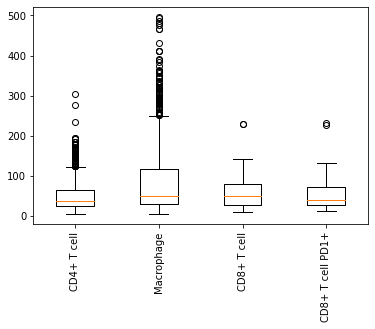

T cells


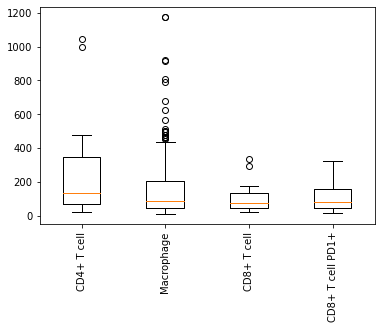

T_1A_9.0


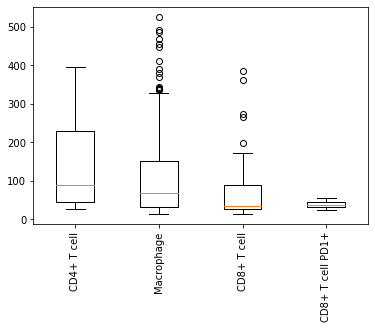

T_1A_10.0


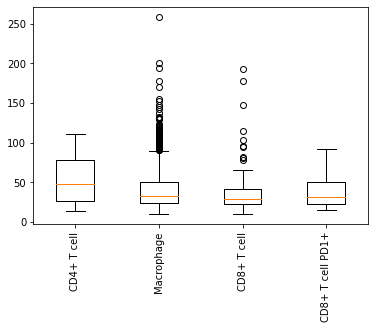

T_1A_11.0


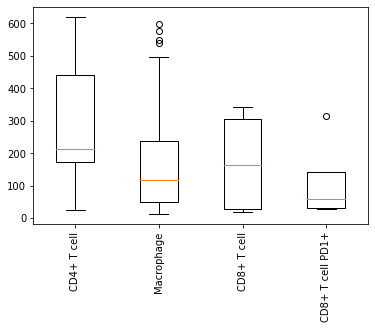

T_1A_12.0


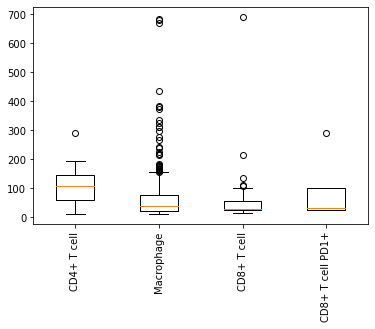

Control_1A_14.0


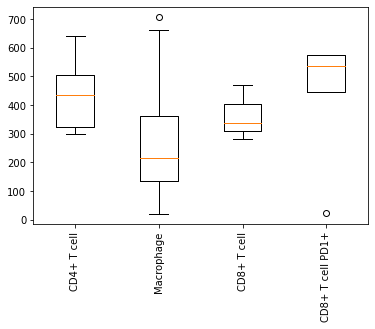

Control_1A_15.0


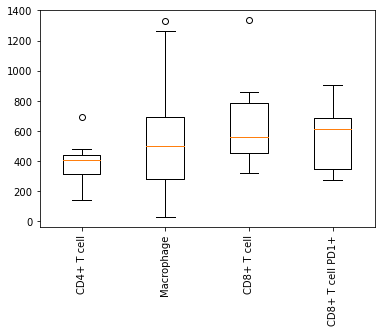

Control_1A_16.0


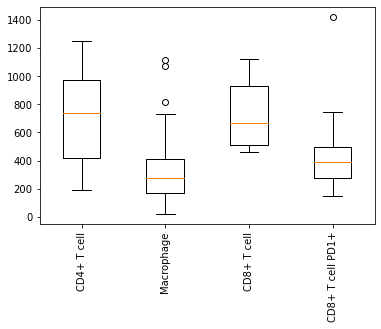

T_1B_14.0


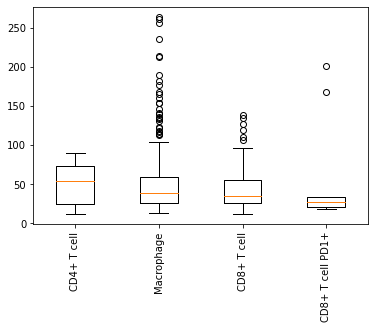

T_1B_15.0


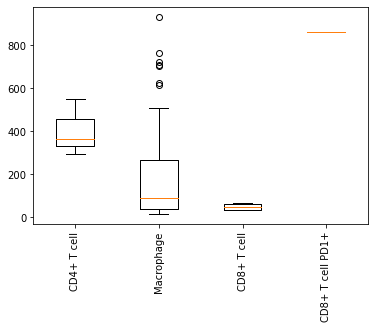

Control_1B_17.0


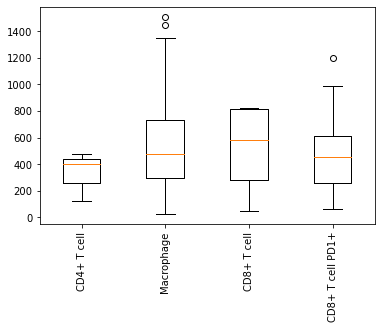

Control_2A_16.0


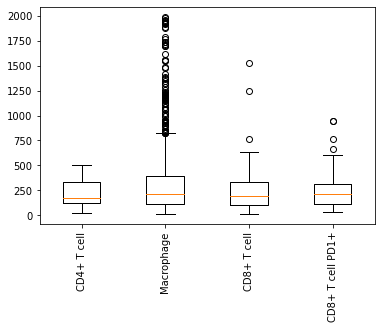

Control_2A_17.0


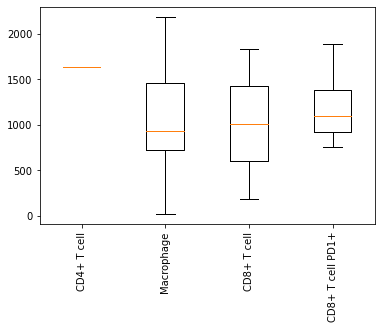

Control_2A_18.0


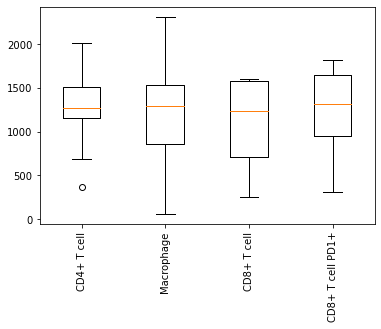

Control_2B_13.0


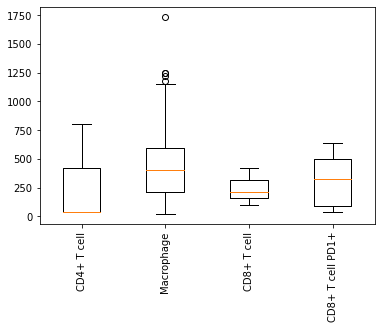

2HC_1


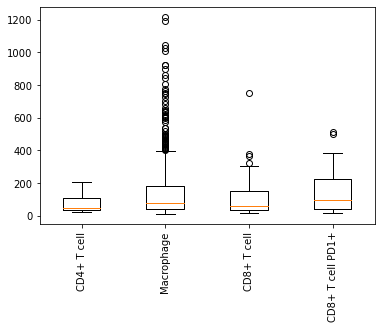

T_2


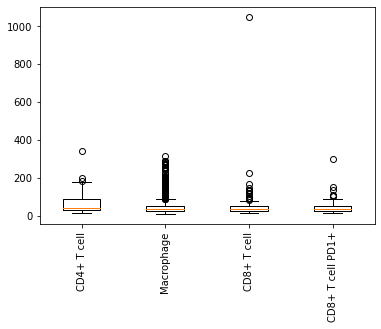

2HC_2


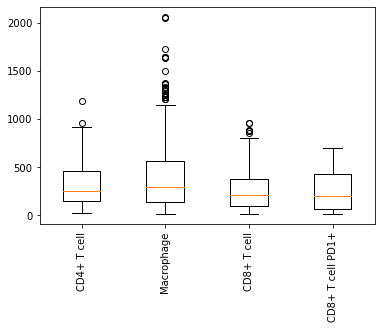

2HC_3


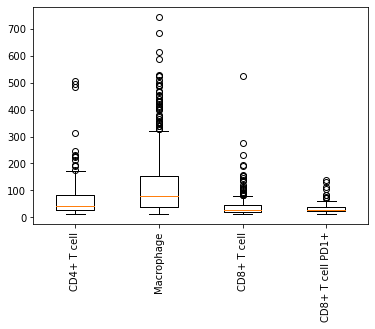

T_3


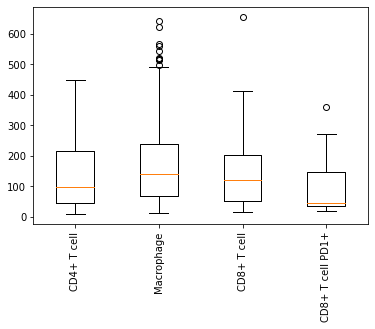

2HC_4


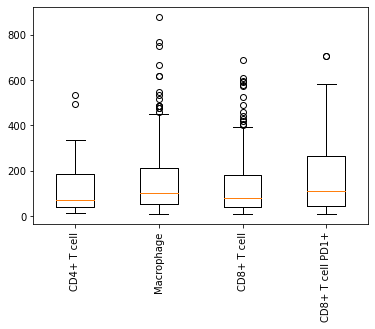

No_Irr_Cntrl_3


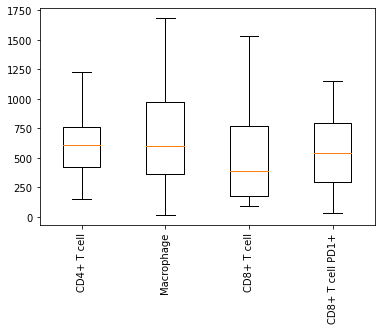

T_3_201125_TNTtumors2_3.0


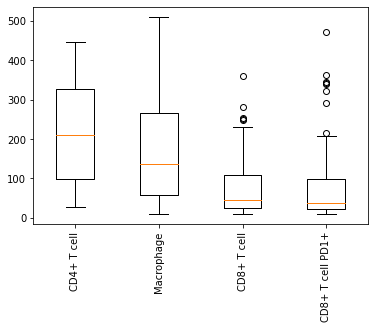

T_3_201125_TNTtumors2_4.0


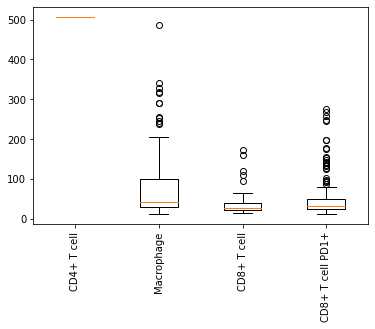

2HC_3_201125_TNTtumors2_6.0


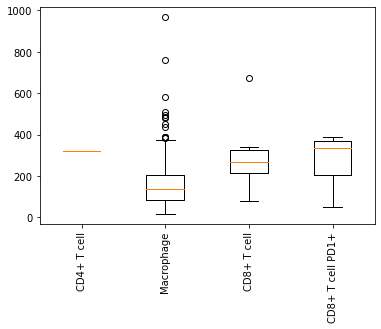

Cntrl_3_201121_TNTtumors2_1.0


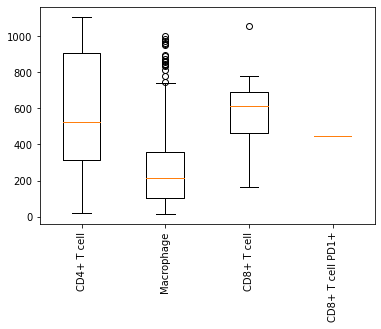

T_3_201121_TNTtumors2_3.0


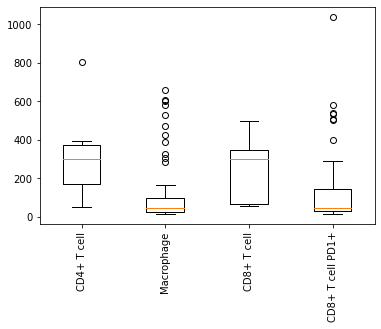

In [74]:
#this code finds the smaller distance between every cell type of interest
#plots the results by region
#gathers all the data in the arrs object
regions = df_sub["unique_region"].unique()

arrs = []

for r in regions:
    print(r)
    df_sub_region = df_sub[df_sub["unique_region"]==r]
    cls, dists = get_distances(df_sub_region)
    plt.boxplot([
        np.nanmin(dists[(0,4)], axis=1),# here the 0 is for CD68 MACS, 4 is for EPi cells
        np.nanmin(dists[(1,4)], axis=1),# here the 0 is for SPP1 MACS, 4 is for EPi cells
        np.nanmin(dists[(2,4)], axis=1),
        np.nanmin(dists[(3,4)], axis=1),
    ], labels = names[:4])
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    plt.show()
    
    df_all = []
    for i in range(4):
        d = np.nanmin(dists[(i,4)], axis=1)
        df = pd.DataFrame({"dist": d, "type": [names[i]]*d.shape[0]  })
        df_all.append(df)
    df = pd.concat(df_all)
    df["unique_region"] = r
    arrs.append(df)

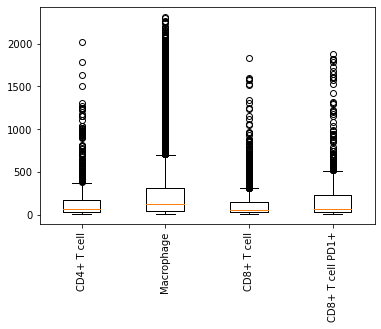

In [75]:
#plot all distances from all regions
df = pd.concat(arrs)

plt.boxplot([
    df[df["type"] == name]["dist"] for name in names[:4]
],labels = names[:4])
plt.xticks(rotation = 90)
plt.show()

In [76]:
df

,dist,type,unique_region
0,24.903154,CD4+ T cell,2HC T cells
1,34.309487,CD4+ T cell,2HC T cells
2,21.681268,CD4+ T cell,2HC T cells
3,44.315159,CD4+ T cell,2HC T cells
4,27.018100,CD4+ T cell,2HC T cells
...,...,...,...
56,48.373546,CD8+ T cell PD1+,T_3_201121_TNTtumors2_3.0
57,67.675697,CD8+ T cell PD1+,T_3_201121_TNTtumors2_3.0
58,82.607506,CD8+ T cell PD1+,T_3_201121_TNTtumors2_3.0
59,34.655447,CD8+ T cell PD1+,T_3_201121_TNTtumors2_3.0


In [186]:
df.to_csv("/media/data/magda/CODEX/CODEX_Magda/exported_data/CRC_MAC_dist_to_Epi.csv", index= False)
